In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
import seaborn as sns

In [3]:
df = pd.read_csv('../processed_data/training_data.csv')
# df = pd.read_csv('training_data.csv')
df.head(2)

,Unnamed: 0,Australia,Central_Rich_Europe,East_Europe_Balkans,Mediteranian_Europe,North_Europe_Scand,user_id,birth_year,country,city,...,LOST_CARD_ORDER,MADE_MONEY_REQUEST_NOT_SPLIT_BILL,METAL_RESERVE_PLAN,NO_INITIAL_CARD_ORDER,NO_INITIAL_CARD_USE,ONBOARDING_TIPS_ACTIVATED_USERS,PROMO,PROMO_CARD_ORDER,REENGAGEMENT_ACTIVE_FUNDS,WELCOME_BACK
0,0,0,0,0,1,0,user_0,1992,Mediteranian_Europe,Madrid,...,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,1.0,0.0
1,1,0,0,1,0,0,user_1,1985,East_Europe_Balkans,Klaipeda,...,0.0,0.0,0.0,1.0,3.0,0.0,1.0,0.0,3.0,0.0


In [4]:
data = ['total_amount', 'age', 'number_transactions', 'user_active_time', 'avg_amount', 'user_trans_periodicity',
        'transaction_period', 'user_trans_time']
x = df[data].values   #making a dataframe of the values i want
n_values = preprocessing.normalize(df[data])   #normalization of the values in the dataframe

#Clustering ragarding the total_amount and user_trans_time

In [5]:
# cluster1 = [data[0], data[5]] = ['total_amount', 'user_trans_time']
c1 = n_values[:, [7, 0]]  

Text(0, 0.5, 'total_amount')

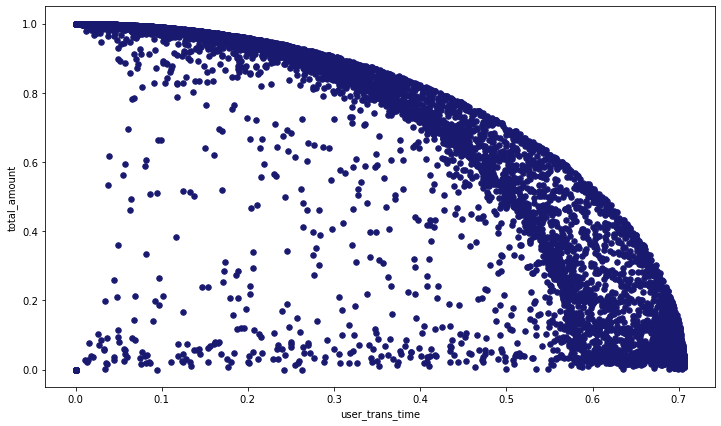

In [6]:
plt.figure(figsize=(12, 7))
plt.subplot(1,1,1)
plt.scatter(c1[:,0], c1[:,1], s=30, c='midnightblue') 
plt.xlabel('user_trans_time')
plt.ylabel('total_amount')

## deciding the k 


Text(0, 0.5, 'score')

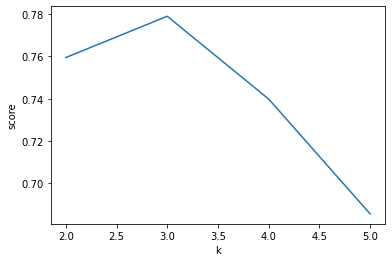

In [7]:
silhouette_scores = []
for k in range(2,6):
  kmeans = KMeans(k)
  kmeans.fit(c1)
  preds = kmeans.predict(c1)
  silhouette_scores.append(silhouette_score(c1, preds))

plt.figure(figsize=(6, 4))     #make the plot
ax = plt.subplot(1,1,1)
ax.plot(range(2,6), silhouette_scores)
ax.set_xlabel('k')
ax.set_ylabel('score')

## clustering


In [8]:
k = 3

kmeans = KMeans(n_clusters=k, init ='k-means++', max_iter=300, n_init=10, random_state=0)

kmeans.fit(c1)

preds = kmeans.predict(c1)
preds

array([1, 1, 1, ..., 1, 1, 1])

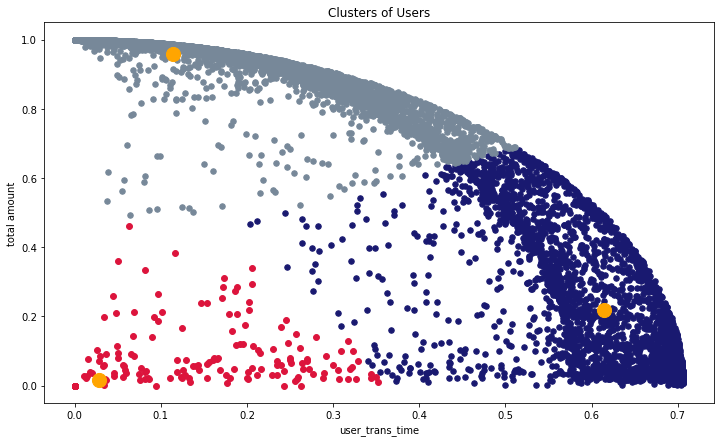

In [9]:
#6 Visualising the clusters
cl1_age = []
cl1_tr = []
cl2_age = []
cl2_tr = []
cl3_age = []
cl3_tr = []

for i in range(len(preds)):
    if preds[i] == 0:
        cl1_age.append(c1[i, 0])
        cl1_tr.append(c1[i, 1])
    elif preds[i] == 1:
        cl2_age.append(c1[i, 0])
        cl2_tr.append(c1[i, 1])
    else:
        cl3_age.append(c1[i, 0])
        cl3_tr.append(c1[i, 1])


plt.figure(figsize=(12, 7))
plt.scatter(cl1_age, cl1_tr, s=30, c='midnightblue', label ='Cluster 1')
plt.scatter(cl2_age, cl2_tr, s=30, c='lightslategrey', label ='Cluster 2')
plt.scatter(cl3_age, cl3_tr, s=35, c='crimson', label ='Cluster 3')

#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='orange', label = 'Centroids')
plt.title('Clusters of Users')
plt.xlabel('user_trans_time')
plt.ylabel('total amount')
plt.show()

#Clustering regarding the periodicity

In [10]:
#cluster4 = [c_N[4], c_N[2]]
c2 = n_values[:, [0, 5]] # [[0, 1]] # cluster3  

Text(0, 0.5, 'total amount')

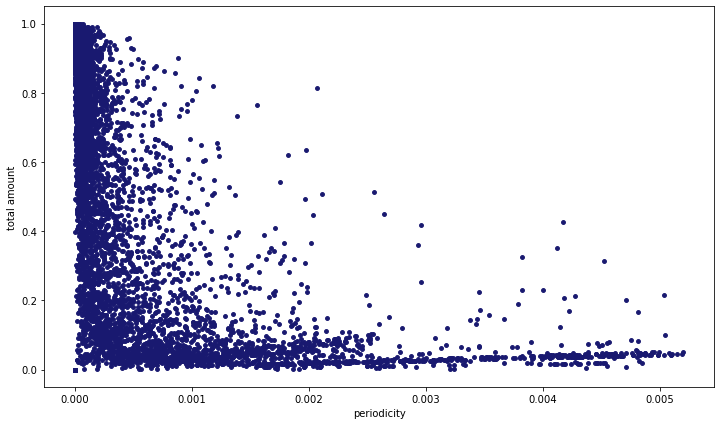

In [11]:
plt.figure(figsize=(12, 7))
plt.subplot(1,1,1)
plt.scatter(c2[:,1], c2[:,0], s=15, c='midnightblue')
plt.xlabel('periodicity')
plt.ylabel('total amount')

Text(0, 0.5, 'score')

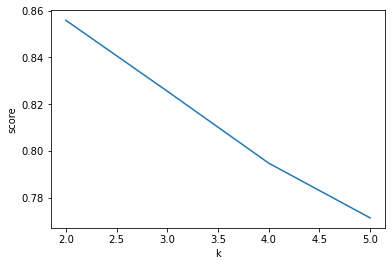

In [12]:
silhouette_scores = []
for k in range(2,6):
  kmeans = KMeans(k)
  kmeans.fit(c2)
  preds = kmeans.predict(c2)
  silhouette_scores.append(silhouette_score(c2, preds))

plt.figure(figsize=(6, 4))     #make the plot
ax = plt.subplot(1,1,1)
ax.plot(range(2,6), silhouette_scores)
ax.set_xlabel('k')
ax.set_ylabel('score')

In [13]:
k = 2

kmeans = KMeans(n_clusters=k, init ='k-means++', max_iter=300, n_init=10, random_state=0)

kmeans.fit(c2)

preds = kmeans.predict(c2)
preds

array([0, 0, 0, ..., 0, 0, 0])

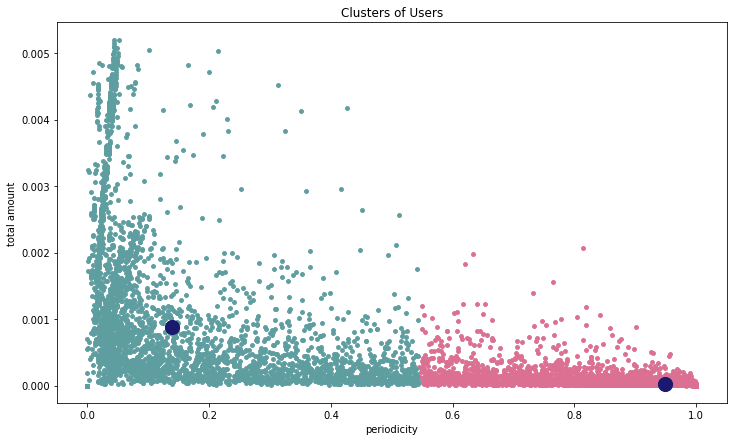

In [14]:
#6 Visualising the clusters
cl1_age = []
cl1_tr = []
cl2_age = []
cl2_tr = []


for i in range(len(preds)):
    if preds[i] == 0:
        cl1_age.append(c2[i, 0])
        cl1_tr.append(c2[i, 1])
    else:
        cl2_age.append(c2[i, 0])
        cl2_tr.append(c2[i, 1])


plt.figure(figsize=(12, 7))
plt.scatter(cl1_age, cl1_tr, s=15, c='palevioletred', label ='Cluster 1')
plt.scatter(cl2_age, cl2_tr, s=15, c='cadetblue', label ='Cluster 2')

#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='midnightblue', label = 'Centroids')
plt.title('Clusters of Users')
plt.xlabel('periodicity')
plt.ylabel('total amount')
plt.show()

#Profit

In [15]:
df1 = pd.read_csv('training_data_cl_profit.csv')
df1.head(2)

FileNotFoundError: [Errno 2] File training_data_cl_profit.csv does not exist: 'training_data_cl_profit.csv'

In [ ]:
data1 = ['total_amount', 'age', 'number_transactions', 'user_active_time', 'avg_amount', 'user_trans_periodicity',
        'transaction_period', 'user_trans_time']
x = df1[data1].values   #making a dataframe of the values i want
n_values1 = preprocessing.normalize(df1[data1])   #normalization of the values in the dataframe

##Total amount and Periodicity

In [0]:
# cluster1 = [data[0], data[5]] = ['total_amount', 'user_trans_time']
c3 = n_values1[:, [5, 0]]  

Text(0, 0.5, 'total_amount')

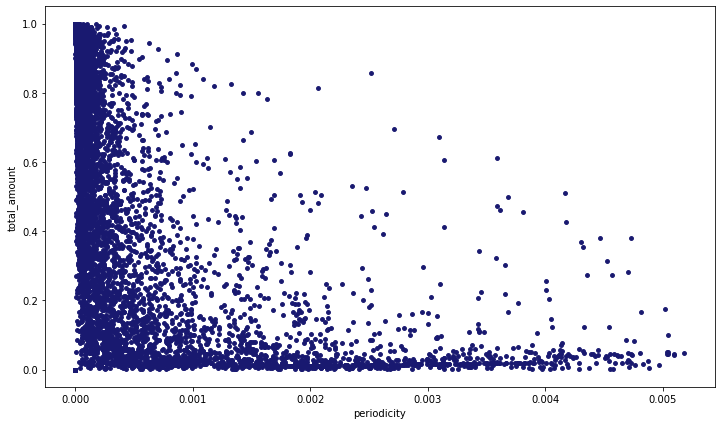

In [0]:
plt.figure(figsize=(12, 7))
plt.subplot(1,1,1)
plt.scatter(c3[:,0], c3[:,1], s=15, c='midnightblue') 
plt.xlabel('periodicity')
plt.ylabel('total_amount')

Text(0, 0.5, 'score')

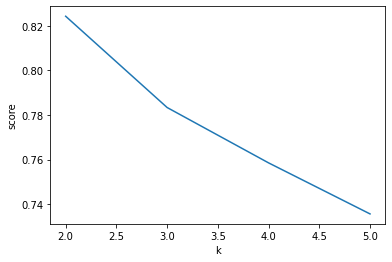

In [0]:
silhouette_scores = []
for k in range(2,6):
  kmeans = KMeans(k)
  kmeans.fit(c3)
  preds = kmeans.predict(c3)
  silhouette_scores.append(silhouette_score(c3, preds))

plt.figure(figsize=(6, 4))     #make the plot
ax = plt.subplot(1,1,1)
ax.plot(range(2,6), silhouette_scores)
ax.set_xlabel('k')
ax.set_ylabel('score')

In [0]:
k = 2

kmeans = KMeans(n_clusters=k, init ='k-means++', max_iter=300, n_init=10, random_state=0)

kmeans.fit(c3)

preds = kmeans.predict(c3)
preds

array([0, 0, 0, ..., 0, 1, 0], dtype=int32)

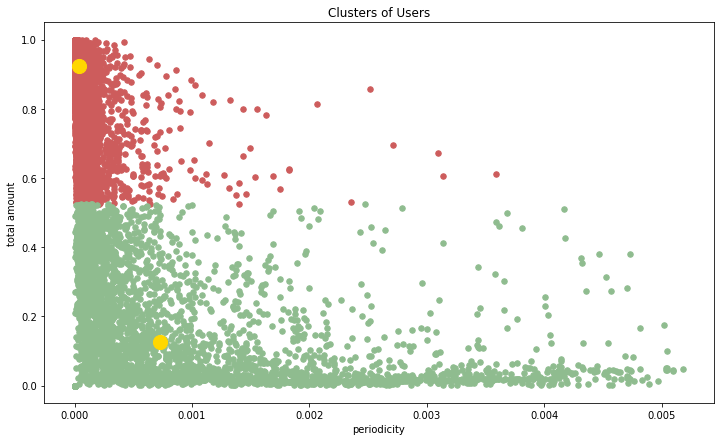

In [0]:
#6 Visualising the clusters
cl1_age = []
cl1_tr = []
cl2_age = []
cl2_tr = []


for i in range(len(preds)):
    if preds[i] == 0:
        cl1_age.append(c3[i, 0])
        cl1_tr.append(c3[i, 1])
    else:
        cl2_age.append(c3[i, 0])
        cl2_tr.append(c3[i, 1])


plt.figure(figsize=(12, 7))
plt.scatter(cl1_age, cl1_tr, s=30, c='indianred', label ='Cluster 1')
plt.scatter(cl2_age, cl2_tr, s=30, c='darkseagreen', label ='Cluster 2')

#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='gold', label = 'Centroids')
plt.title('Clusters of Users')
plt.xlabel('periodicity')
plt.ylabel('total amount')
plt.show()

## Total amount and user_trans_time

Text(0, 0.5, 'total_amount')

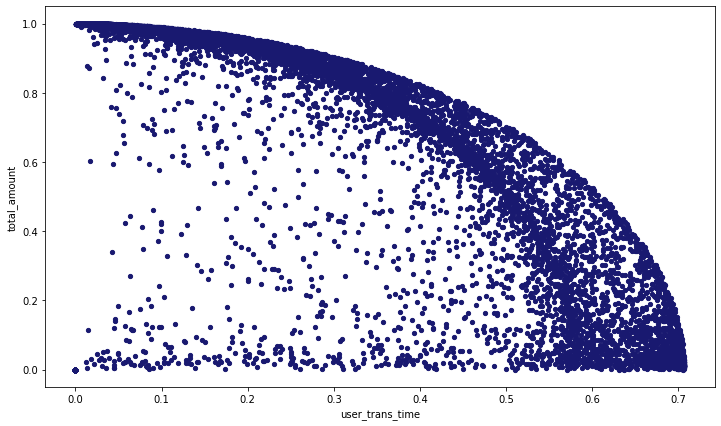

In [0]:
c4 = n_values1[:, [7, 0]]  

plt.figure(figsize=(12, 7))
plt.subplot(1,1,1)
plt.scatter(c4[:,0], c4[:,1], s=18, c='midnightblue') 
plt.xlabel('user_trans_time')
plt.ylabel('total_amount')

Text(0, 0.5, 'score')

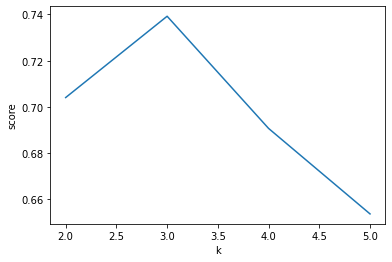

In [0]:
silhouette_scores = []
for k in range(2,6):
  kmeans = KMeans(k)
  kmeans.fit(c4)
  preds = kmeans.predict(c4)
  silhouette_scores.append(silhouette_score(c4, preds))

plt.figure(figsize=(6, 4))     #make the plot
ax = plt.subplot(1,1,1)
ax.plot(range(2,6), silhouette_scores)
ax.set_xlabel('k')
ax.set_ylabel('score')

In [0]:
k = 3

kmeans = KMeans(n_clusters=k, init ='k-means++', max_iter=300, n_init=10, random_state=0)

kmeans.fit(c4)

preds = kmeans.predict(c4)
preds

array([0, 0, 0, ..., 0, 2, 0], dtype=int32)

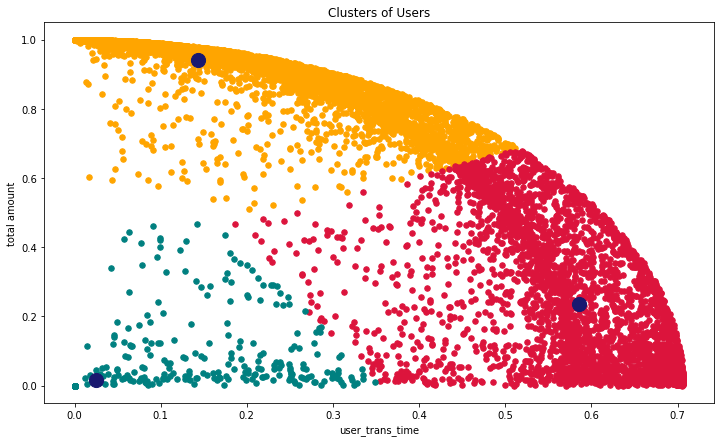

In [0]:
#6 Visualising the clusters
cl1_age = []
cl1_tr = []
cl2_age = []
cl2_tr = []
cl3_age = []
cl3_tr = []

for i in range(len(preds)):
    if preds[i] == 0:
        cl1_age.append(c4[i, 0])
        cl1_tr.append(c4[i, 1])
    elif preds[i] == 1:
        cl2_age.append(c4[i, 0])
        cl2_tr.append(c4[i, 1])
    else:
        cl3_age.append(c4[i, 0])
        cl3_tr.append(c4[i, 1])


plt.figure(figsize=(12, 7))
plt.scatter(cl1_age, cl1_tr, s=30, c='orange', label ='Cluster 1')
plt.scatter(cl2_age, cl2_tr, s=30, c='crimson', label ='Cluster 2')
plt.scatter(cl3_age, cl3_tr, s=30, c='teal', label ='Cluster 3')

#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='midnightblue', label = 'Centroids')
plt.title('Clusters of Users')
plt.xlabel('user_trans_time')
plt.ylabel('total amount')
plt.show()

##Age and Periodicity

Text(0, 0.5, 'age')

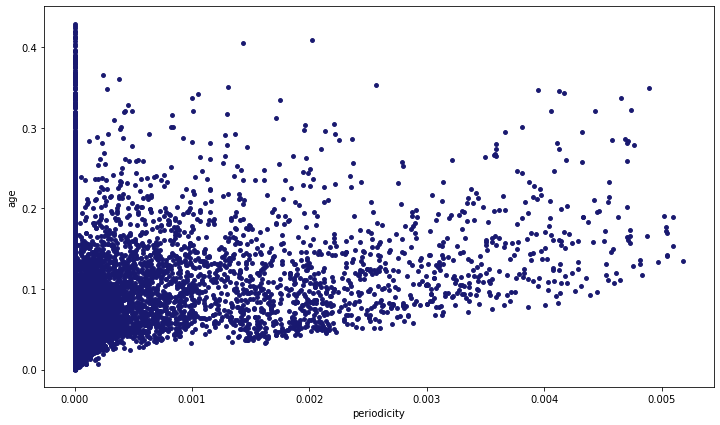

In [0]:
c5 = n_values1[:, [5, 1]]  

plt.figure(figsize=(12, 7))
plt.subplot(1,1,1)
plt.scatter(c5[:,0], c5[:,1], s=15, c='midnightblue' ) 
plt.xlabel('periodicity')
plt.ylabel('age')

Text(0, 0.5, 'score')

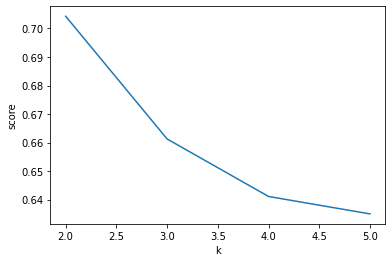

In [0]:
silhouette_scores = []
for k in range(2,6):
  kmeans = KMeans(k)
  kmeans.fit(c5)
  preds = kmeans.predict(c5)
  silhouette_scores.append(silhouette_score(c5, preds))

plt.figure(figsize=(6, 4))     #make the plot
ax = plt.subplot(1,1,1)
ax.plot(range(2,6), silhouette_scores)
ax.set_xlabel('k')
ax.set_ylabel('score')

In [0]:
k = 2

kmeans = KMeans(n_clusters=k, init ='k-means++', max_iter=300, n_init=10, random_state=0)

kmeans.fit(c5)

preds = kmeans.predict(c5)
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

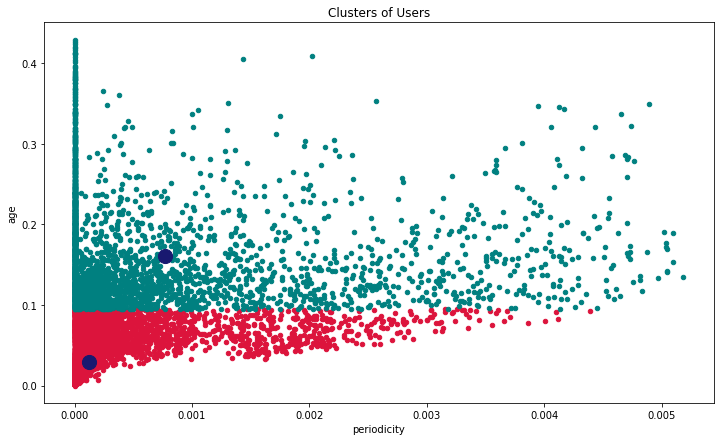

In [0]:
#6 Visualising the clusters
cl1_age = []
cl1_tr = []
cl2_age = []
cl2_tr = []


for i in range(len(preds)):
    if preds[i] == 0:
        cl1_age.append(c5[i, 0])
        cl1_tr.append(c5[i, 1])
    else:
        cl2_age.append(c5[i, 0])
        cl2_tr.append(c5[i, 1])


plt.figure(figsize=(12, 7))
plt.scatter(cl1_age, cl1_tr,  s=20, c='crimson', label ='Cluster 1')
plt.scatter(cl2_age, cl2_tr,  s=20, c='teal', label ='Cluster 2')


#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],  s=200, c='midnightblue', label = 'Centroids')
plt.title('Clusters of Users')
plt.xlabel('periodicity')
plt.ylabel('age')
plt.show()